In [1]:
import pandas as pd
import numpy as np
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import joblib
import os
from IPython.display import Image, display

shap.initjs()
os.makedirs("plots", exist_ok=True)

In [2]:
df= pd.read_csv(r"..\Export\test_data.csv")
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,AgeGroup_31-45,AgeGroup_46-60,AgeGroup_60+,UtilizationBand_Medium,UtilizationBand_High,UtilizationBand_Very High,DependentsRisk_Medium,DependentsRisk_High,Actual,Note
0,0.000000,50,0,0.087478,9.193296,6,1,0,1,0.0,...,False,True,False,False,False,False,False,False,1,This is the exact test split used for model ev...
1,0.005770,52,0,0.063603,9.257892,16,0,1,0,0.0,...,False,True,False,False,False,False,False,False,0,This is the exact test split used for model ev...
2,0.807706,64,0,0.555962,8.318986,8,0,2,0,1.0,...,False,False,True,False,True,False,False,False,0,This is the exact test split used for model ev...
3,0.001076,53,0,0.269278,7.804251,8,0,0,0,0.0,...,False,True,False,False,False,False,False,False,0,This is the exact test split used for model ev...
4,0.022680,58,0,0.369809,9.445136,17,0,2,0,0.0,...,False,True,False,False,False,False,False,False,1,This is the exact test split used for model ev...


In [3]:
df = df.drop(columns=["Note"])

In [4]:
X = df.drop("Actual", axis=1)
y = df["Actual"]

# Remove any extra Note columns that shouldn't be in the feature set
X = X.drop(columns=[col for col in X.columns if col.startswith('Note_')], errors='ignore')

In [5]:
models = {
    "XGBoost": joblib.load(r"..\Export\xgb_model.joblib"),
    "LightGBM": joblib.load(r"..\Export\lgb_model.joblib"),
    "RandomForest": joblib.load(r"..\Export\rf_model.joblib")
}


C:\Users\akane\AppData\Local\Programs\Python\Python311\Lib\pickle.py:1718: UserWarning: [20:09:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\gbm\../common/error_msg.h:83: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)
E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\intern\

In [6]:

# Check dimensions
print(f"X shape: {X.shape}")
print(f"X columns: {X.columns.tolist()}")
xgb_model = models["XGBoost"]
print(f"XGBoost expected features: {xgb_model.n_features_in_}")


X shape: (45000, 19)
X columns: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'DebtToIncome', 'AgeGroup_31-45', 'AgeGroup_46-60', 'AgeGroup_60+', 'UtilizationBand_Medium', 'UtilizationBand_High', 'UtilizationBand_Very High', 'DependentsRisk_Medium', 'DependentsRisk_High']
XGBoost expected features: 19


In [7]:
"""import shap
import matplotlib.pyplot as plt

for name, model in models.items():
    print(f"Generating SHAP for {name}...")

    # Use background data for better baseline expectations
    explainer = shap.TreeExplainer(model)

    # Compute SHAP values
    shap_values = explainer.shap_values(X)

    # Summary plot
    plt.figure()
    shap.summary_plot(shap_values, X, show=False)
    plt.savefig(f"plots/{name}_shap_summary.png", bbox_inches="tight")
    plt.close()

    # Bar plot (report-friendly)
    plt.figure()
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.savefig(f"plots/{name}_shap_bar.png", bbox_inches="tight")
    plt.close()"""

'import shap\nimport matplotlib.pyplot as plt\n\nfor name, model in models.items():\n    print(f"Generating SHAP for {name}...")\n\n    # Use background data for better baseline expectations\n    explainer = shap.TreeExplainer(model)\n\n    # Compute SHAP values\n    shap_values = explainer.shap_values(X)\n\n    # Summary plot\n    plt.figure()\n    shap.summary_plot(shap_values, X, show=False)\n    plt.savefig(f"plots/{name}_shap_summary.png", bbox_inches="tight")\n    plt.close()\n\n    # Bar plot (report-friendly)\n    plt.figure()\n    shap.summary_plot(shap_values, X, plot_type="bar", show=False)\n    plt.savefig(f"plots/{name}_shap_bar.png", bbox_inches="tight")\n    plt.close()'

Generating SHAP summary plots...
  Processing XGBoost...


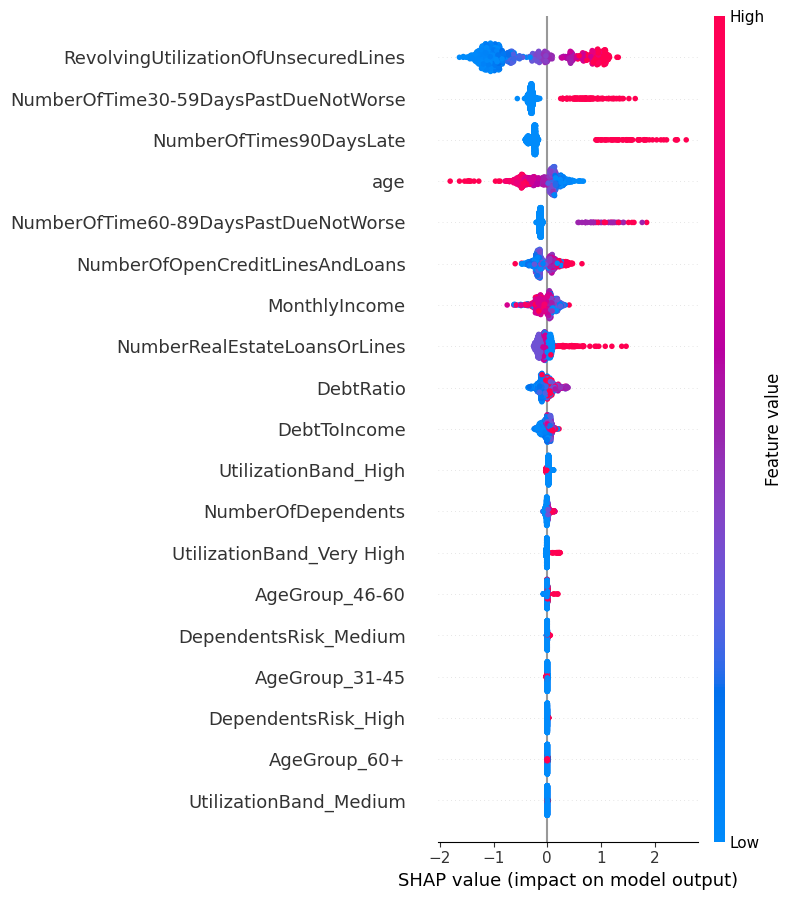

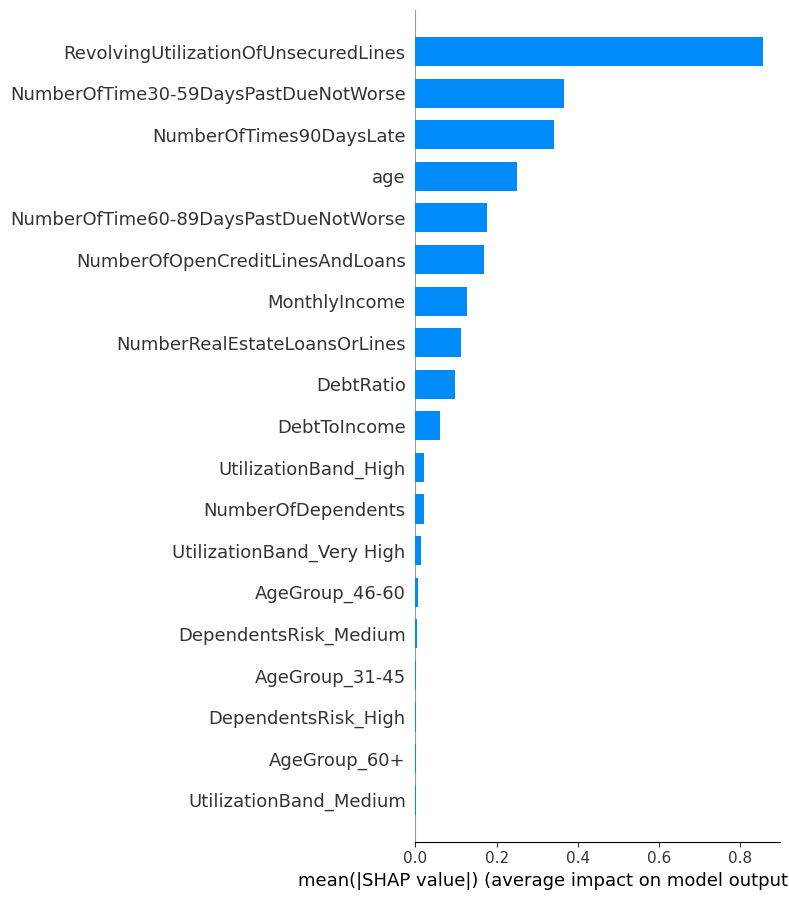

  ✓ XGBoost SHAP plots saved and displayed
  Processing LightGBM...


E:\intern\intern\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


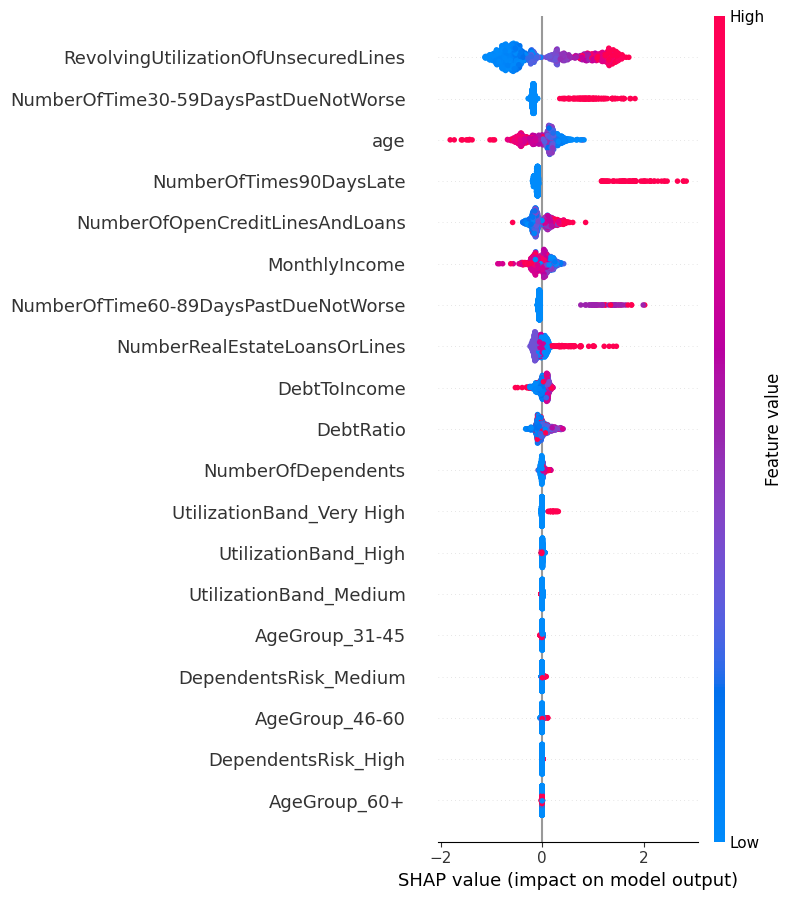

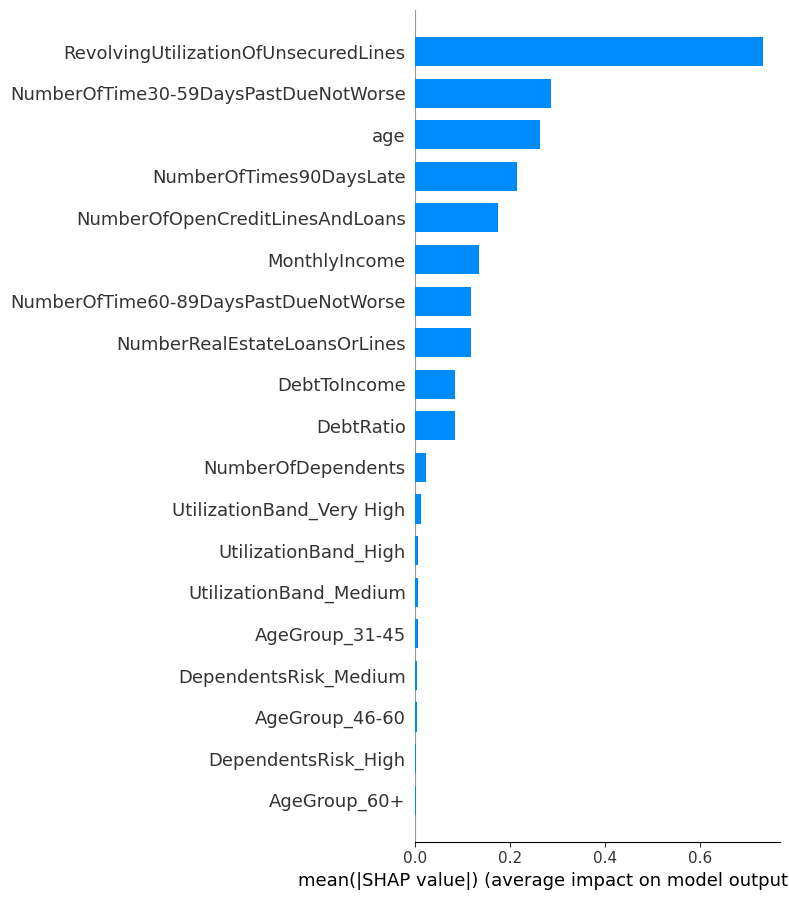

  ✓ LightGBM SHAP plots saved and displayed
  Processing RandomForest...


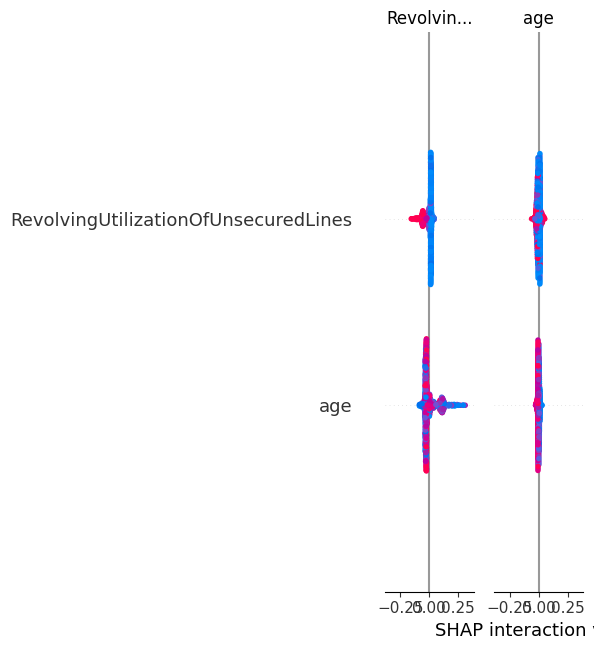

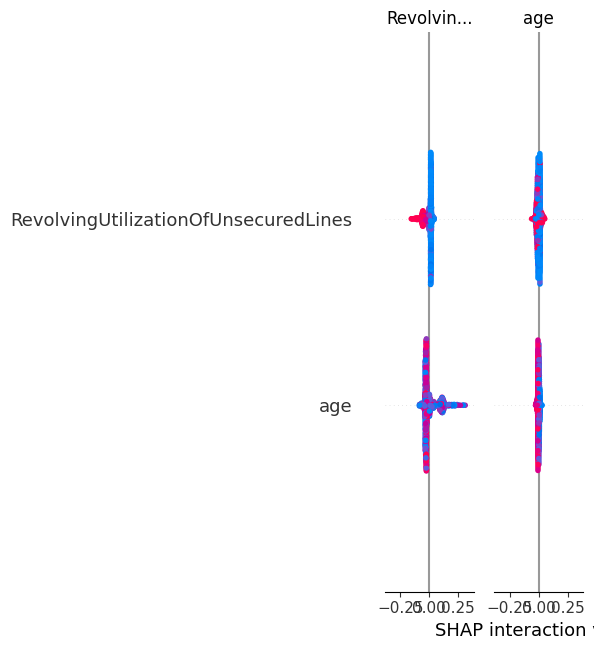

  ✓ RandomForest SHAP plots saved and displayed


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
import shap
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Use a sample for faster SHAP computation
X_sample = X.sample(n=min(1000, len(X)), random_state=42)

print("Generating SHAP summary plots...")
for name, model in models.items():
    try:
        print(f"  Processing {name}...")
        
        # Use background data for better baseline expectations
        explainer = shap.TreeExplainer(model)

        # Compute SHAP values on sample
        shap_values = explainer.shap_values(X_sample)
        
        # Handle list output (binary classification)
        sv = shap_values[1] if isinstance(shap_values, list) else shap_values

        # Summary plot
        plt.figure(figsize=(10, 6))
        shap.summary_plot(sv, X_sample, show=False)
        fig = plt.gcf()
        fig.tight_layout()
        summary_path = f"plots/{name}_shap_summary.png"
        fig.savefig(summary_path, bbox_inches="tight", dpi=100)
        plt.close(fig)
        display(Image(filename=summary_path))

        # Bar plot (report-friendly)
        plt.figure(figsize=(10, 6))
        shap.summary_plot(sv, X_sample, plot_type="bar", show=False)
        fig = plt.gcf()
        fig.tight_layout()
        bar_path = f"plots/{name}_shap_bar.png"
        fig.savefig(bar_path, bbox_inches="tight", dpi=100)
        plt.close(fig)
        display(Image(filename=bar_path))
        
        print(f"  ✓ {name} SHAP plots saved and displayed")
    except Exception as e:
        print(f"  ✗ {name} error: {str(e)[:200]}")

Generating SHAP force plot for XGBoost...


<Figure size 1200x300 with 0 Axes>

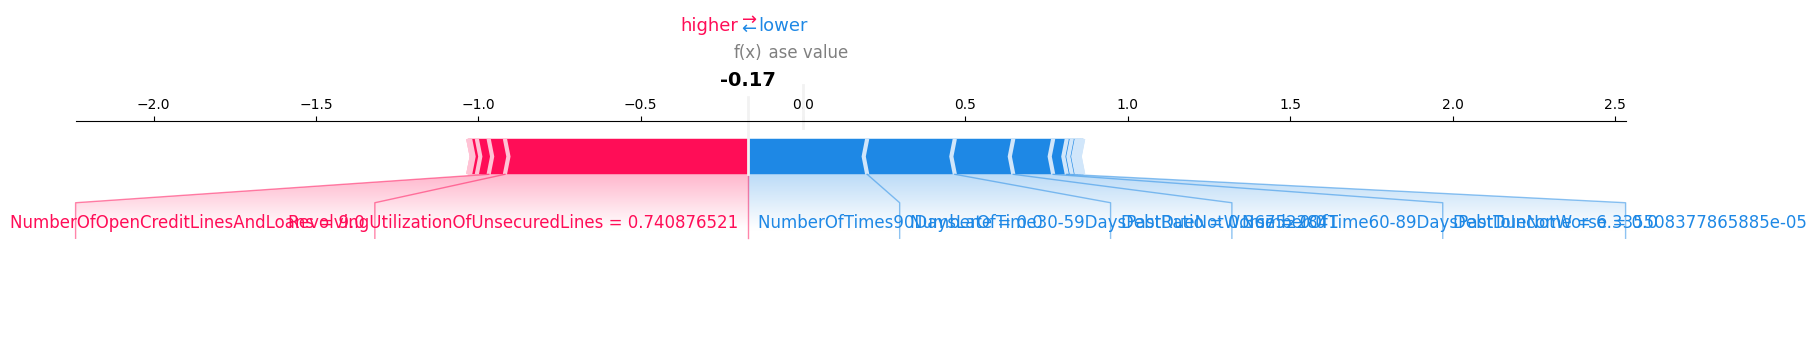

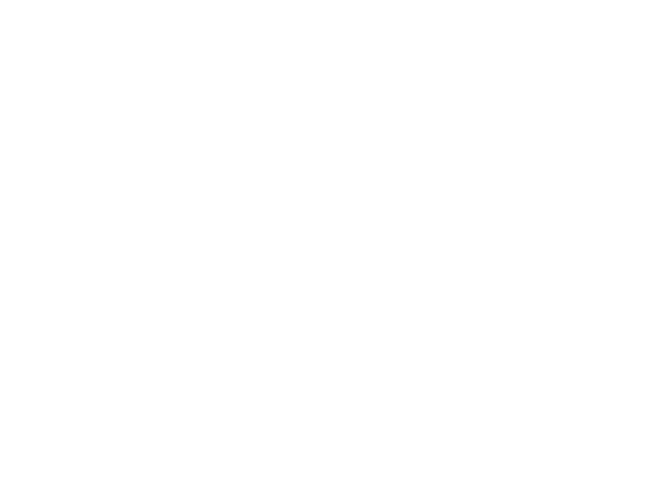

 XGBoost force plot saved and displayed
Generating SHAP force plot for LightGBM...


E:\intern\intern\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


<Figure size 1200x300 with 0 Axes>

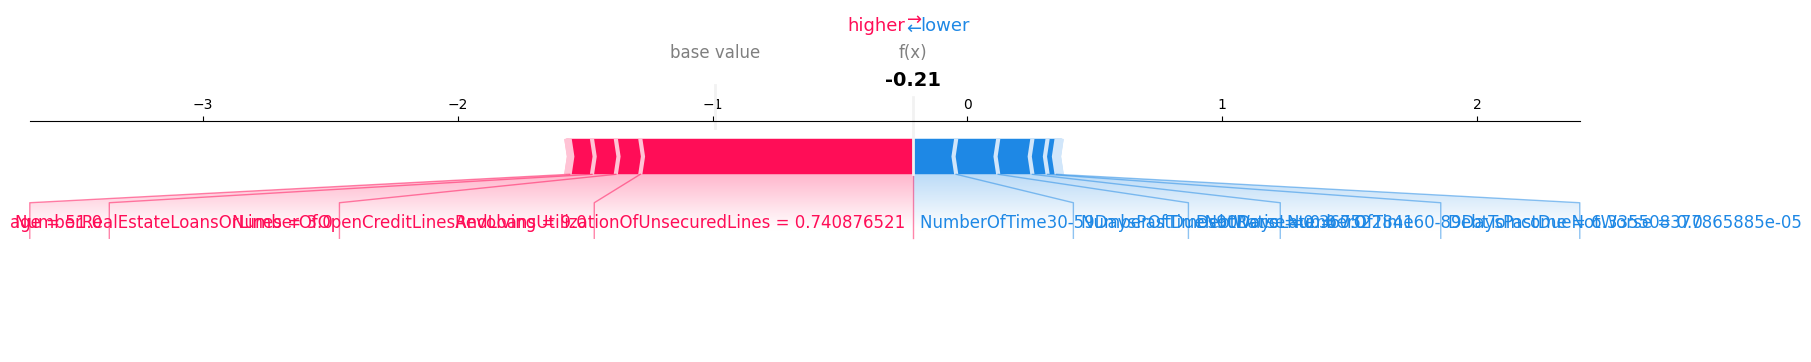

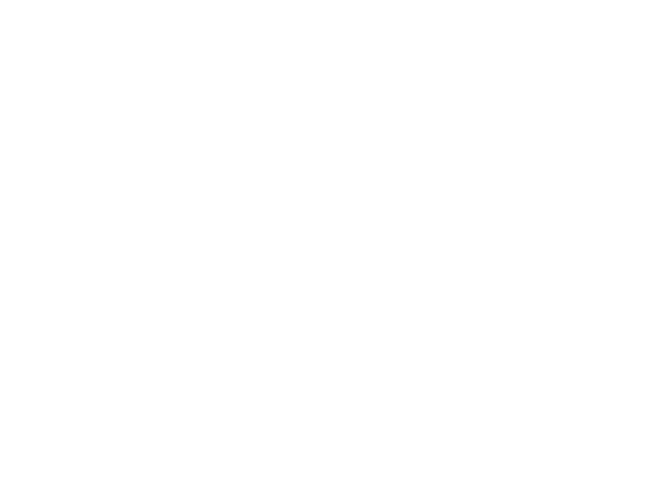

 LightGBM force plot saved and displayed
Generating SHAP force plot for RandomForest...
 RandomForest force plot error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_


<Figure size 1200x300 with 0 Axes>

In [9]:
index = 0  # first row in sample
from IPython.display import Image, display

for name, model in models.items():
    print(f"Generating SHAP force plot for {name}...")
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)

    # Handle binary classification where shap_values might be a list
    sv = shap_values[1] if isinstance(shap_values, list) else shap_values
    
    # Get the correct expected value
    try:
        expected = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, tuple)) else explainer.expected_value
    except (TypeError, IndexError):
        expected = explainer.expected_value
    
    # Create force plot with feature names and save/display
    try:
        plt.figure(figsize=(12, 3))
        shap.force_plot(
            expected,
            sv[index],
            X_sample.iloc[index],
            feature_names=X_sample.columns.tolist(),
            matplotlib=True
        )
        fig = plt.gcf()
        fig.tight_layout()
        fp_path = f"plots/{name}_shap_local_{index}.png"
        fig.savefig(fp_path, bbox_inches="tight", dpi=100)
        plt.close(fig)
        display(Image(filename=fp_path))
        print(f" {name} force plot saved and displayed")
    except Exception as e:
        print(f" {name} force plot error: {str(e)[:200]}")

In [10]:
print("Initializing LIME explainer...")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_sample.values,
    feature_names=X_sample.columns.tolist(),
    class_names=["No Default", "Default"],
    mode="classification",
    random_state=42
)
print("LIME explainer initialized")

Initializing LIME explainer...
LIME explainer initialized



Generating LIME explanations...
  Processing XGBoost...


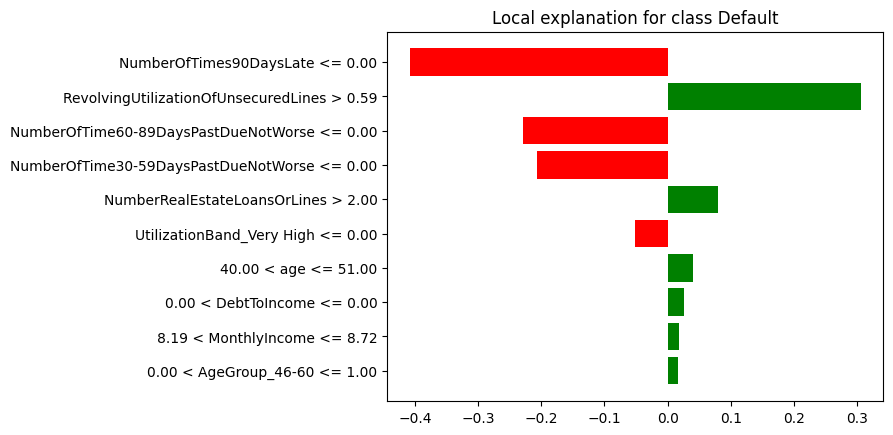

 XGBoost LIME saved and displayed
  Processing LightGBM...


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


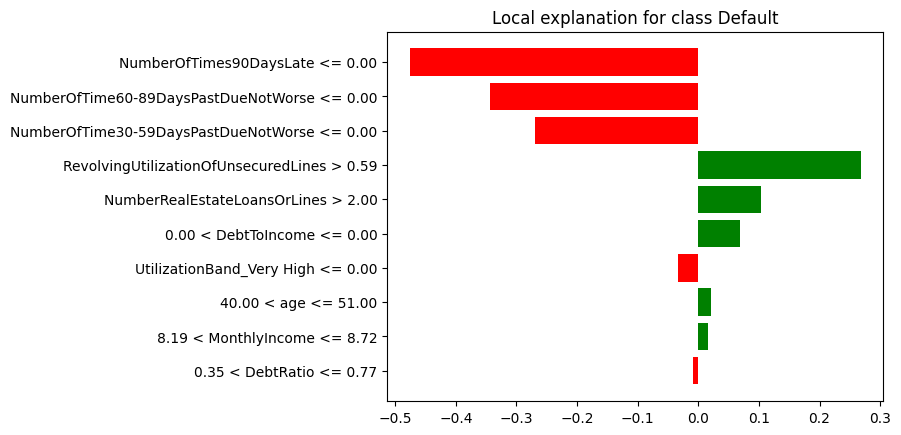

 LightGBM LIME saved and displayed
  Processing RandomForest...


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


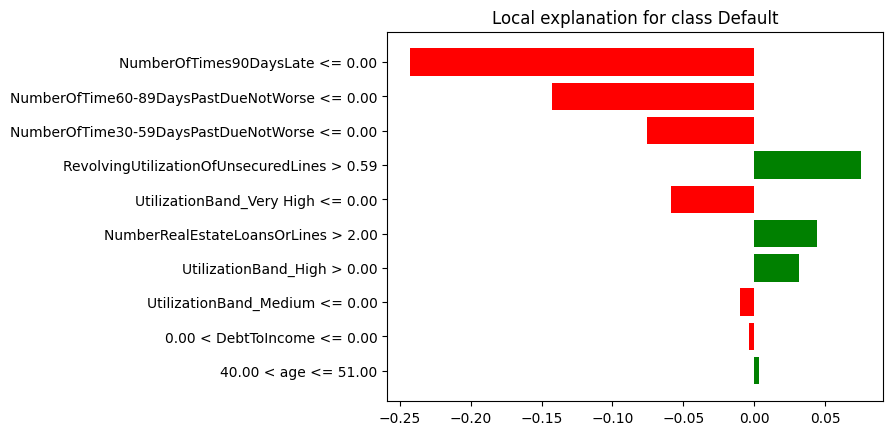

 RandomForest LIME saved and displayed

All explanations completed!


In [11]:
from IPython.display import Image, display

print("\nGenerating LIME explanations...")
for name, model in models.items():
    try:
        print(f"  Processing {name}...")
        
        lime_exp = lime_explainer.explain_instance(
            X_sample.iloc[index].values,
            model.predict_proba,
            num_features=10
        )

        fig = lime_exp.as_pyplot_figure()
        lime_path = f"plots/{name}_lime_local_{index}.png"
        fig.savefig(lime_path, bbox_inches="tight", dpi=100)
        plt.close(fig)
        display(Image(filename=lime_path))
        print(f" {name} LIME saved and displayed")
    except Exception as e:
        print(f"  {name} LIME error: {str(e)[:200]}")

print("\nAll explanations completed!")

In [12]:
import pandas as pd

# Load your dataset
df = pd.read_csv("../Export/updated_data.csv")   # or test_data.csv

# Separate features (remove target column if present)
if "Actual" in df.columns:
    X = df.drop("Actual", axis=1)
else:
    X = df.copy()

print("Shape of X:", X.shape)


Shape of X: (150000, 20)


In [13]:
# Separate target if present
if "Actual" in df.columns:
    y = df["Actual"]
    X = df.drop("Actual", axis=1)
else:
    X = df.copy()

# Convert everything to numeric
X = X.astype(float)

print("Feature shape:", X.shape)


Feature shape: (150000, 20)


In [14]:
import joblib

model = joblib.load("../Export/lgb_model.joblib")

print("Model Loaded ")


Model Loaded 


E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
import numpy as np
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=X.columns.tolist(),
    class_names=['No Default', 'Default'],
    mode='classification'
)

print("LIME Explainer Ready ")


LIME Explainer Ready 


In [16]:
print(model.n_features_in_)
print(model.feature_name_)


19
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'DebtToIncome', 'AgeGroup_31-45', 'AgeGroup_46-60', 'AgeGroup_60+', 'UtilizationBand_Medium', 'UtilizationBand_High', 'UtilizationBand_Very_High', 'DependentsRisk_Medium', 'DependentsRisk_High']


In [17]:
import pandas as pd
import numpy as np
import joblib
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

os.makedirs("plots", exist_ok=True)

# Load dataset
df = pd.read_csv("../Export/updated_data.csv")

# Separate target if present
if "Actual" in df.columns:
    y = df["Actual"]
    X = df.drop("Actual", axis=1)
else:
    X = df.copy()

# Convert to numeric
X = X.astype(float)

print("Feature shape:", X.shape)

# Load all models
models = {
    "XGBoost": joblib.load("../Export/xgb_model.joblib"),
    "LightGBM": joblib.load("../Export/lgb_model.joblib"),
    "RandomForest": joblib.load("../Export/rf_model.joblib")
}

index = 0  # Row to explain

print("\nGenerating LIME explanations for all models...\n")

for name, model in models.items():
    try:
        print(f"Processing {name}...")

        # Align features to model training features
        if hasattr(model, "feature_name_"):
            X_aligned = X[model.feature_name_]
        else:
            X_aligned = X

        # Create LIME explainer
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_aligned),
            feature_names=X_aligned.columns.tolist(),
            class_names=['No Default', 'Default'],
            mode='classification',
            random_state=42
        )

        # Generate explanation
        exp = explainer.explain_instance(
            X_aligned.iloc[index].values,
            model.predict_proba,
            num_features=10
        )

        # Save plot
        fig = exp.as_pyplot_figure()
        lime_path = f"plots/{name}_lime_local_{index}.png"
        fig.savefig(lime_path, bbox_inches="tight", dpi=100)
        plt.close(fig)

        display(Image(filename=lime_path))
        print(f"✓ {name} LIME explanation saved\n")

    except Exception as e:
        print(f"✗ {name} error: {str(e)}\n")

print("All models completed.")


Feature shape: (150000, 20)

Generating LIME explanations for all models...

Processing XGBoost...


E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.8.0. This might lead to breaking code or i

✗ XGBoost error: Feature shape mismatch, expected: 19, got 20

Processing LightGBM...
✗ LightGBM error: "['UtilizationBand_Very_High'] not in index"

Processing RandomForest...
✗ RandomForest error: X has 20 features, but RandomForestClassifier is expecting 19 features as input.

All models completed.


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Processing XGBoost...
Model expects: 19
Dataset now: 19


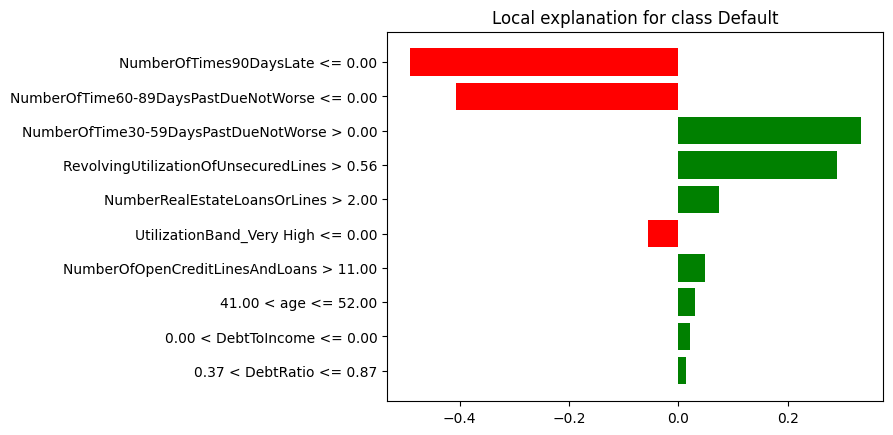

✓ XGBoost completed

Processing LightGBM...
Model expects: 19
Dataset now: 19


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


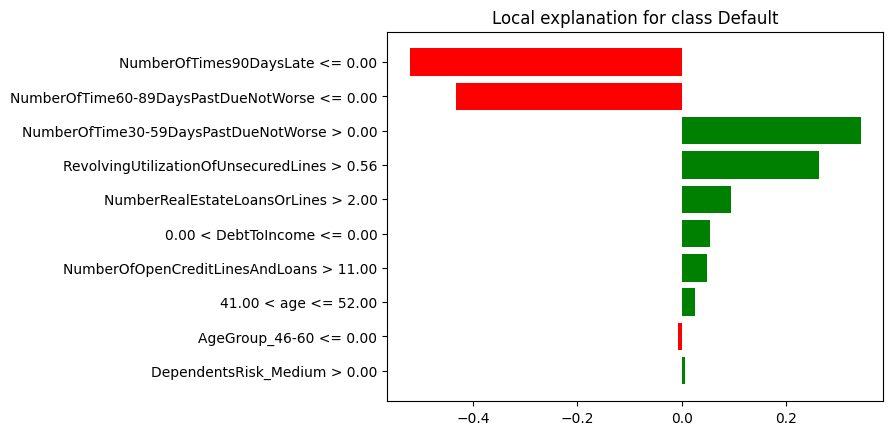

✓ LightGBM completed

Processing RandomForest...
Model expects: 19
Dataset now: 19


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


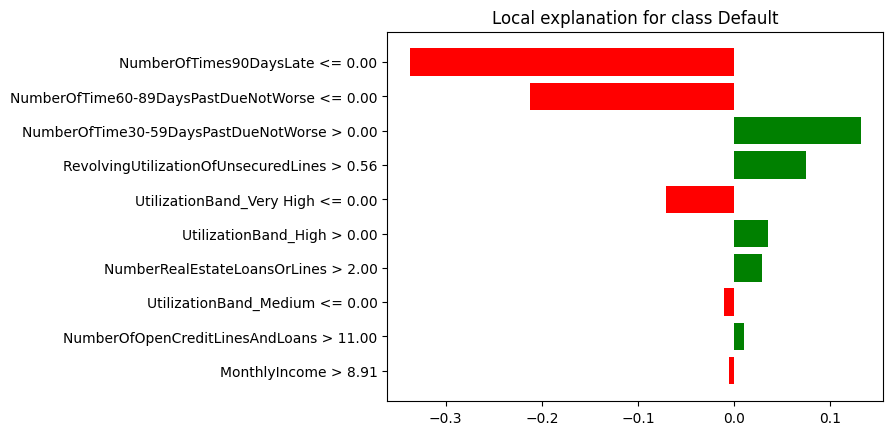

✓ RandomForest completed



In [18]:
for name, model in models.items():
    try:
        print(f"Processing {name}...")

        # Get model's expected feature names
        if hasattr(model, "feature_names_in_"):
            expected_features = model.feature_names_in_
        elif hasattr(model, "feature_name_"):  # LightGBM
            expected_features = model.feature_name_
        else:
            expected_features = X.columns

        # Add missing columns with 0
        for col in expected_features:
            if col not in X.columns:
                X[col] = 0

        # Remove extra columns
        X_aligned = X[expected_features]

        print("Model expects:", len(expected_features))
        print("Dataset now:", X_aligned.shape[1])

        # Create LIME explainer
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_aligned),
            feature_names=X_aligned.columns.tolist(),
            class_names=['No Default', 'Default'],
            mode='classification',
            random_state=42
        )

        exp = explainer.explain_instance(
            X_aligned.iloc[index].values,
            model.predict_proba,
            num_features=10
        )

        fig = exp.as_pyplot_figure()
        lime_path = f"plots/{name}_lime_local_{index}.png"
        fig.savefig(lime_path, bbox_inches="tight", dpi=100)
        plt.close(fig)

        display(Image(filename=lime_path))
        print(f"✓ {name} completed\n")

    except Exception as e:
        print(f"✗ {name} error: {str(e)}\n")



Processing XGBoost...
Model expects: 19 features
Dataset aligned shape: (150000, 19)


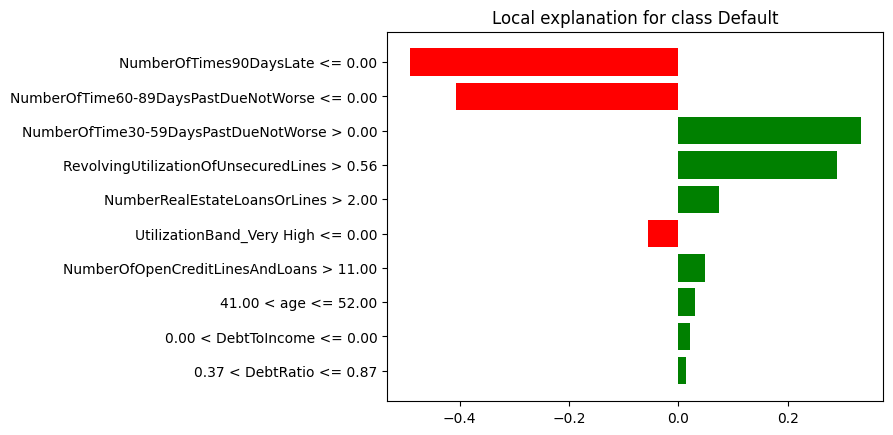

✓ XGBoost completed

Processing LightGBM...
Model expects: 19 features
Dataset aligned shape: (150000, 19)


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


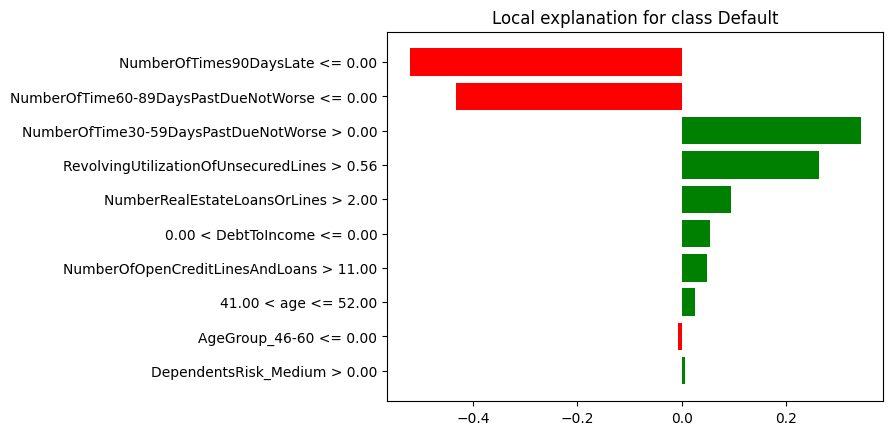

✓ LightGBM completed

Processing RandomForest...
Model expects: 19 features
Dataset aligned shape: (150000, 19)


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


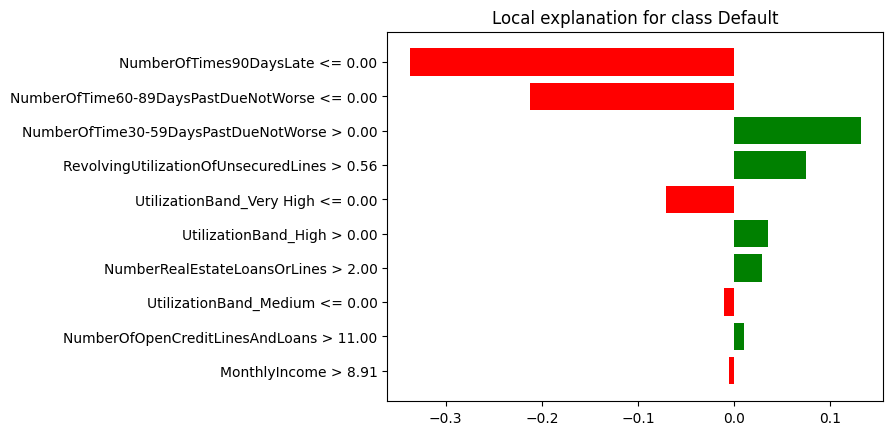

✓ RandomForest completed


In [19]:
for name, model in models.items():
    try:
        print(f"\nProcessing {name}...")

        # Copy original dataset (important!)
        X_temp = X.copy()

        # Get expected features from model
        if hasattr(model, "feature_names_in_"):
            expected_features = list(model.feature_names_in_)
        elif hasattr(model, "feature_name_"):  # LightGBM
            expected_features = list(model.feature_name_)
        else:
            expected_features = list(X_temp.columns)

        print("Model expects:", len(expected_features), "features")

        # Add missing columns
        missing_cols = [col for col in expected_features if col not in X_temp.columns]
        for col in missing_cols:
            X_temp[col] = 0

        # Keep only required columns & correct order
        X_aligned = X_temp[expected_features]

        print("Dataset aligned shape:", X_aligned.shape)

        # ---- LIME ----
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_aligned),
            feature_names=X_aligned.columns.tolist(),
            class_names=['No Default', 'Default'],
            mode='classification',
            random_state=42
        )

        exp = explainer.explain_instance(
            X_aligned.iloc[index].values,
            model.predict_proba,
            num_features=10
        )

        fig = exp.as_pyplot_figure()
        lime_path = f"plots/{name}_lime_local_{index}.png"
        fig.savefig(lime_path, bbox_inches="tight", dpi=100)
        plt.close(fig)

        display(Image(filename=lime_path))
        print(f"✓ {name} completed")

    except Exception as e:
        print(f"✗ {name} error: {str(e)}")



Processing XGBoost...
Aligned shape: (150000, 19)
✓ LIME done
✓ SHAP done
Displaying results:


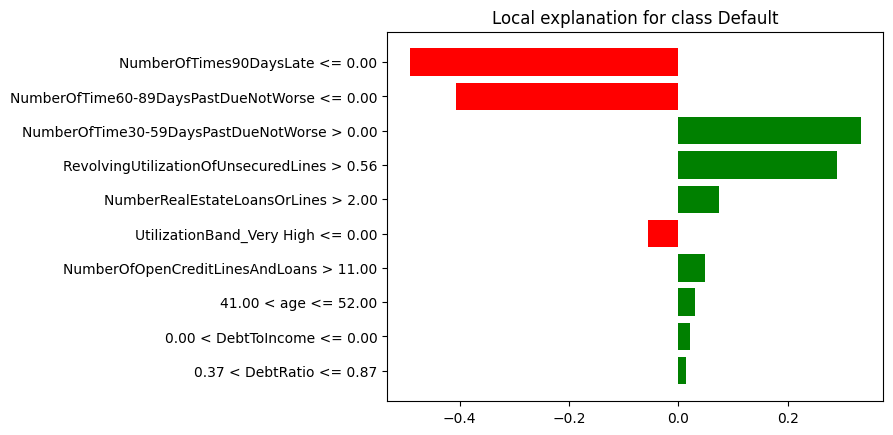

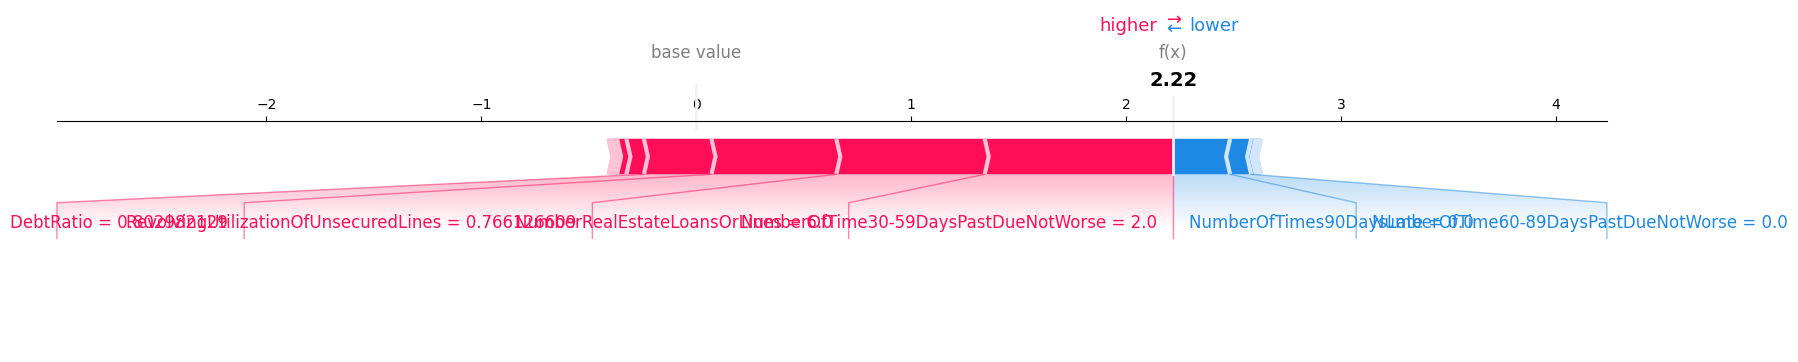

✅ XGBoost completed successfully


Processing LightGBM...
Aligned shape: (150000, 19)


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✓ LIME done


E:\intern\intern\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


✓ SHAP done
Displaying results:


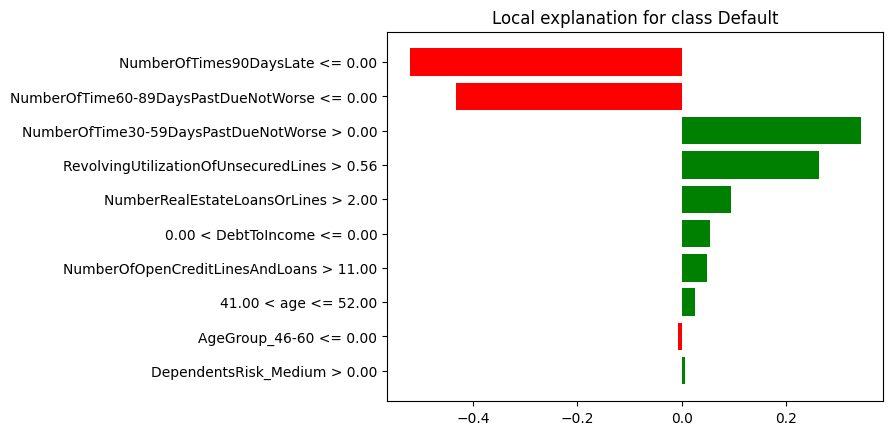

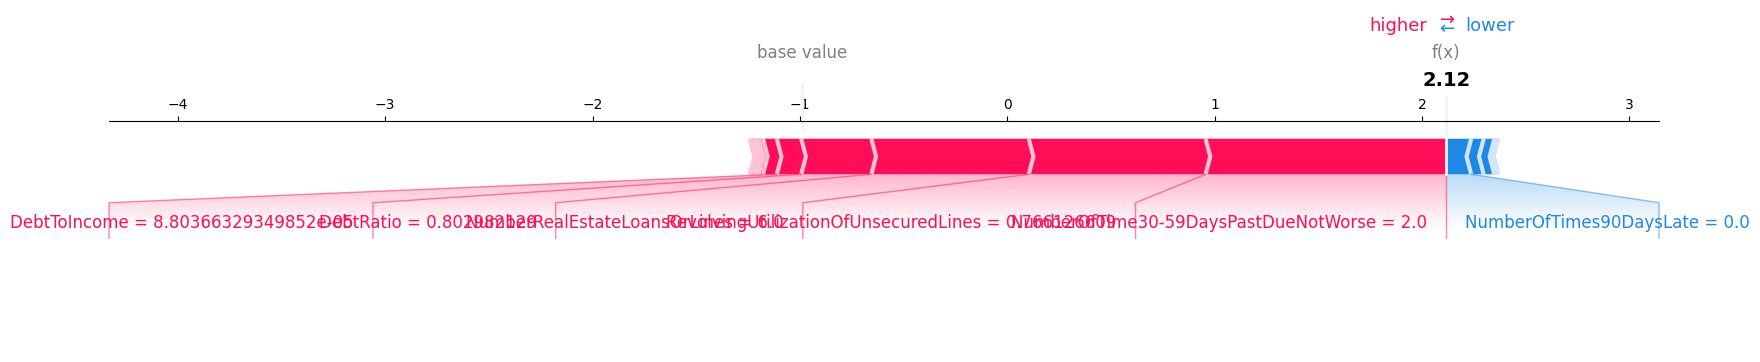

✅ LightGBM completed successfully


Processing RandomForest...
Aligned shape: (150000, 19)


E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


✓ LIME done
✗ RandomForest error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

All models completed.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
import os

os.makedirs("plots", exist_ok=True)

index = 0  # row to explain

for name, model in models.items():
    try:
        print(f"\nProcessing {name}...")

        # -----------------------
        # 1️⃣ SAFE FEATURE ALIGNMENT
        # -----------------------
        X_temp = X.copy()

        if hasattr(model, "feature_names_in_"):
            expected_features = list(model.feature_names_in_)
        elif hasattr(model, "feature_name_"):
            expected_features = list(model.feature_name_)
        else:
            expected_features = list(X_temp.columns)

        # Add missing columns
        for col in expected_features:
            if col not in X_temp.columns:
                X_temp[col] = 0

        # Keep only expected columns (correct order)
        X_aligned = X_temp[expected_features]

        print("Aligned shape:", X_aligned.shape)

        # =========================
        # 🔵 LIME EXPLANATION
        # =========================
        explainer_lime = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_aligned),
            feature_names=X_aligned.columns.tolist(),
            class_names=['No Default', 'Default'],
            mode='classification',
            random_state=42
        )

        exp = explainer_lime.explain_instance(
            X_aligned.iloc[index].values,
            model.predict_proba,
            num_features=10
        )

        fig_lime = exp.as_pyplot_figure()
        lime_path = f"plots/{name}_LIME_{index}.png"
        fig_lime.savefig(lime_path, bbox_inches="tight", dpi=100)
        plt.close(fig_lime)

        print("✓ LIME done")

        # =========================
        # 🟢 SHAP EXPLANATION
        # =========================

        # Tree-based models → use TreeExplainer
        explainer_shap = shap.TreeExplainer(model)
        shap_values = explainer_shap.shap_values(X_aligned.iloc[[index]])

        # For binary classification
        if isinstance(shap_values, list):
            shap_val = shap_values[1]
        else:
            shap_val = shap_values

        plt.figure()
        shap.force_plot(
            explainer_shap.expected_value[1] if isinstance(explainer_shap.expected_value, list)
            else explainer_shap.expected_value,
            shap_val,
            X_aligned.iloc[[index]],
            matplotlib=True,
            show=False
        )

        shap_path = f"plots/{name}_SHAP_{index}.png"
        plt.savefig(shap_path, bbox_inches="tight", dpi=100)
        plt.close()

        print("✓ SHAP done")

        # Display both
        print("Displaying results:")
        display(Image(filename=lime_path))
        display(Image(filename=shap_path))

        print(f"✅ {name} completed successfully\n")

    except Exception as e:
        print(f"✗ {name} error: {str(e)}\n")

print("All models completed.")


In [21]:
import os
os.makedirs("plots", exist_ok=True)  # creates folder if not exists


In [22]:
import matplotlib.pyplot as plt


In [23]:
# ==============================
# COMPLETE WORKING LIME CELL
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lime.lime_tabular
import joblib
import os

# Create output folder
os.makedirs("plots", exist_ok=True)

# 1️⃣ Load dataset
df = pd.read_csv("../Export/updated_data.csv")

# Separate features
if "Actual" in df.columns:
    X = df.drop("Actual", axis=1)
else:
    X = df.copy()

X = X.astype(float)

# 2️⃣ Load RandomForest model
model = joblib.load("../Export/rf_model.joblib")

# 3️⃣ Align features with model
if hasattr(model, "feature_names_in_"):
    expected_features = list(model.feature_names_in_)
else:
    expected_features = list(X.columns)

for col in expected_features:
    if col not in X.columns:
        X[col] = 0

X_aligned = X[expected_features]

# 4️⃣ Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_aligned),
    feature_names=X_aligned.columns.tolist(),
    class_names=['No Default', 'Default'],
    mode='classification',
    random_state=42
)

# 5️⃣ Explain first row
exp = explainer.explain_instance(
    X_aligned.iloc[0].values,
    model.predict_proba,
    num_features=10
)

# 6️⃣ Save image
fig = exp.as_pyplot_figure()
fig.savefig("plots/LIME_plot.png", bbox_inches="tight", dpi=300)
plt.close(fig)

print("✅ LIME plot saved successfully inside 'plots' folder.")


E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\intern\intern\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\intern\intern\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


✅ LIME plot saved successfully inside 'plots' folder.


In [24]:
import os
os.makedirs("Model_Results", exist_ok=True)


In [25]:
fig.savefig("Model_Results/LIME_plot.png", bbox_inches="tight", dpi=300)
plt.close(fig)


In [26]:
import shap
import matplotlib.pyplot as plt
import os

os.makedirs("Model_Results", exist_ok=True)

# Create explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer(X_aligned.iloc[[0]])

# Select class 1 (positive class)
single_explanation = shap_values[0, :, 1]

# Plot waterfall
plt.figure(figsize=(8,6))
shap.plots.waterfall(single_explanation, show=False)

shap_path = os.path.join("Model_Results", "RandomForest_SHAP.png")
plt.savefig(shap_path, bbox_inches="tight", dpi=300)
plt.close()

print("✅ SHAP waterfall saved successfully.")


✅ SHAP waterfall saved successfully.
